Download link: https://docs.activeloop.ai/datasets/lfpw-dataset

In [1]:
import hub
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
dt = hub.load("hub://activeloop/LFPW-train")
ds = hub.load("hub://activeloop/LFPW-test")
dataloader_train = dt.tensorflow()
dataloader_test = ds.tensorflow()

hub://activeloop/LFPW-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-train
hub://activeloop/LFPW-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-test


tf.Tensor([176], shape=(1,), dtype=int32)
tf.Tensor([185], shape=(1,), dtype=int32)
tf.Tensor([195], shape=(1,), dtype=int32)
tf.Tensor([199], shape=(1,), dtype=int32)
tf.Tensor([192], shape=(1,), dtype=int32)
tf.Tensor([184], shape=(1,), dtype=int32)
tf.Tensor([232], shape=(1,), dtype=int32)
tf.Tensor([240], shape=(1,), dtype=int32)
tf.Tensor([248], shape=(1,), dtype=int32)
tf.Tensor([256], shape=(1,), dtype=int32)
tf.Tensor([249], shape=(1,), dtype=int32)
tf.Tensor([241], shape=(1,), dtype=int32)


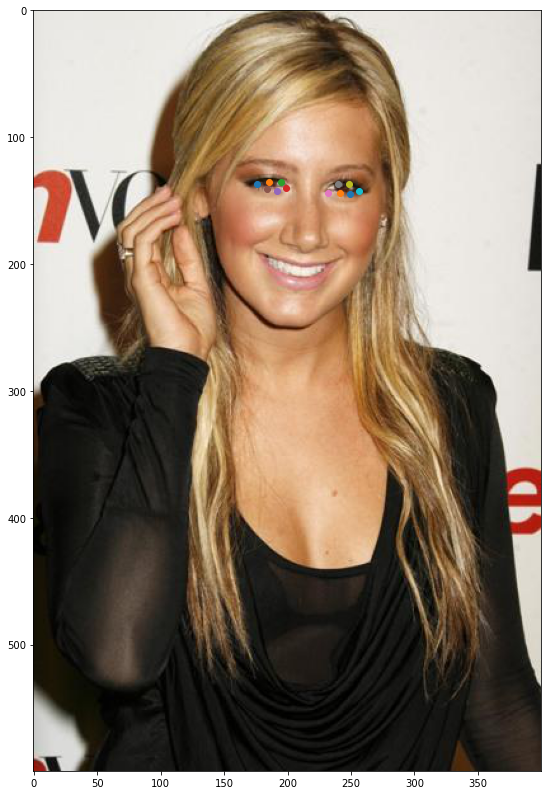

In [93]:
fig, ax = plt.subplots(figsize=(14, 14))
for i in dataloader_test:
    ax.imshow(i["images"])
    index=0
    for j in range(0, len(i["keypoints"]), 3):
        index+=1
        if index > 36 and index < 49:
            print(i["keypoints"][j])
            ax.scatter(i["keypoints"][j],i["keypoints"][j+1])
    break

공식사이트(https://neerajkumar.org/databases/lfpw/)의 설명보다 keypoint가 두배 가량 많다(35 -> 68)  
배포과정에서(https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/) 에 나온 방법에 따라 새로 annotaion된듯 하다.

In [16]:
=

0--Parade/0_Parade_marchingband_1_465.jpg
126
345 211 4 4 2 0 0 0 2 0 
331 126 3 3 0 0 0 1 0 0 
250 126 3 4 2 0 0 0 2 0 
221 128 4 5 0 0 0 1 0 0 
427 116 3 4 2 0 0 0 2 0 
393 79 3 4 0 0 0 1 0 0 
373 119 3 4 2 0 0 1 2 0 
90 225 6 5 2 0 0 1 2 0 
128 237 5 8 0 0 0 1 0 0 
170 230 5 6 2 0 0 1 1 1 
114 285 5 7 2 0 0 1 1 1 
81 304 9 9 2 0 0 1 0 0 
44 303 10 8 2 0 0 0 1 0 
7 264 6 8 2 0 0 0 0 0 
31 231 5 6 2 0 0 1 0 0 
26 192 6 8 2 0 0 1 0 0 
66 196 4 6 2 0 0 1 0 0 
74 175 5 5 0 0 0 1 0 0 
113 168 4 5 0 0 0 1 0 0 
129 165 4 5 2 0 0 0 2 0 
158 162 4 4 2 0 0 0 2 0 
174 156 5 6 2 0 0 0 2 0 
197 159 4 4 0 0 0 1 0 0 
192 191 3 5 2 0 0 1 0 0 
242 179 5 6 2 0 0 0 2 1 
161 269 5 6 2 0 1 1 2 0 
0 317 3 8 2 0 0 0 2 0 
346 68 3 4 0 0 0 1 0 0 
418 62 2 3 0 0 0 1 0 0 
376 59 3 3 0 0 0 1 0 0 
120 599 12 17 2 0 0 0 2 1 
1008 256 6 10 2 0 0 0 2 0 
853 131 4 5 2 0 0 0 1 1 
878 131 5 5 2 0 0 0 1 1 
900 138 4 6 2 0 0 0 1 1 
922 142 5 5 2 0 0 0 1 0 
936 139 5 6 0 0 0 1 0 0 
959 134 5 7 2 0 0 0 1 1 
984 141 5 5 2 

855 283 8 9 2 0 0 0 1 0 
1016 272 8 13 2 0 0 0 1 0 
991 277 13 11 2 0 0 0 2 1 
201 326 13 17 2 0 0 0 1 0 
559 309 12 18 2 0 0 0 1 0 
664 305 14 21 2 0 0 0 1 1 
708 272 10 13 2 0 0 0 1 0 
863 284 16 18 2 0 1 0 1 0 
377 310 14 16 2 0 0 0 2 0 
0--Parade/0_Parade_marchingband_1_156.jpg
3
164 248 68 74 0 0 1 0 1 0 
568 250 64 68 0 0 1 0 0 0 
872 186 82 106 0 0 1 0 0 0 
0--Parade/0_Parade_Parade_0_545.jpg
2
152 188 306 466 0 0 0 0 0 0 
614 362 264 320 0 0 0 0 0 1 
0--Parade/0_Parade_Parade_0_850.jpg
25
32 319 16 15 1 0 1 0 0 0 
49 327 11 12 1 0 1 0 1 0 
72 318 18 21 1 0 0 0 0 0 
125 321 14 16 1 0 1 0 0 0 
153 314 18 23 1 0 1 0 0 0 
188 318 16 17 1 0 1 0 0 0 
208 329 6 7 2 0 1 0 2 0 
249 316 19 24 1 0 1 0 0 0 
266 318 11 13 1 0 1 0 1 0 
274 327 7 9 1 0 1 0 2 0 
365 314 21 24 1 0 1 0 0 0 
408 328 5 6 2 0 0 0 1 0 
426 331 7 7 2 0 0 0 1 0 
483 297 25 31 1 0 1 0 0 0 
517 329 5 6 2 0 0 0 1 0 
543 335 12 14 1 0 1 0 0 0 
606 291 23 29 1 0 0 0 2 0 
623 288 29 38 0 0 1 0 0 0 
680 336 7 8 2 0 0 0 0 0 


963 315 11 14 0 0 0 0 0 0 
918 309 8 10 0 0 0 0 0 0 
895 308 8 12 0 0 0 0 0 0 
866 311 11 11 0 0 0 0 0 0 
868 289 7 9 2 0 0 0 1 0 
843 286 9 13 2 0 0 0 0 0 
973 374 7 9 0 0 0 1 0 0 
828 398 15 17 2 0 0 0 1 0 
801 333 7 9 0 0 0 1 0 0 
795 316 10 12 2 0 0 0 1 0 
778 300 6 8 0 0 0 1 0 0 
774 289 7 8 0 0 0 1 0 0 
786 293 9 14 0 0 0 0 0 0 
695 270 6 9 0 0 0 1 0 0 
672 274 6 10 0 0 0 1 0 0 
725 356 12 15 2 0 0 0 2 0 
748 366 13 15 2 0 0 0 2 0 
681 382 11 15 0 0 0 0 0 0 
938 379 9 12 0 0 0 0 0 0 
640 341 13 15 2 0 0 0 2 0 
621 364 13 16 0 0 0 0 0 0 
577 365 10 12 2 0 0 0 2 0 
599 337 10 13 0 0 0 0 0 0 
514 358 9 11 2 0 0 0 2 0 
528 338 9 14 2 0 0 0 1 0 
561 282 6 9 0 0 0 1 0 0 
593 275 6 8 0 0 0 1 0 0 
516 254 7 9 0 0 0 1 0 0 
634 271 8 9 0 0 0 1 0 0 
465 344 9 13 0 0 0 0 0 0 
451 330 11 12 2 0 0 0 2 0 
508 289 6 9 0 0 0 1 0 0 
488 305 12 14 0 0 0 0 0 0 
406 376 13 17 2 0 0 0 1 0 
392 341 11 13 0 0 0 0 0 0 
328 331 11 14 2 0 0 0 2 0 
261 302 8 13 2 0 0 0 2 0 
417 259 5 8 0 0 0 1 0 0 
399 258 

132 365 41 60 1 0 0 0 0 0 
416 351 33 48 2 0 0 0 1 0 
775 11 12 12 0 0 0 0 0 0 
670 11 11 14 0 0 0 0 0 0 
11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_774.jpg
178
74 103 7 11 2 0 0 0 2 0 
91 101 7 9 2 0 0 0 0 0 
162 117 10 8 2 0 1 0 2 0 
181 112 9 10 2 0 0 0 0 0 
121 110 10 8 2 0 0 0 2 0 
112 111 9 10 2 0 0 0 1 0 
211 129 7 10 2 0 0 0 2 0 
243 131 8 8 2 0 0 0 2 0 
230 112 7 8 2 0 0 0 0 0 
256 122 5 9 2 0 0 0 2 0 
265 117 6 8 2 0 0 0 1 0 
290 129 6 9 2 0 0 0 2 0 
278 132 7 8 2 0 0 0 1 0 
313 109 8 9 2 0 1 0 0 0 
339 104 8 8 2 0 0 0 0 0 
350 99 5 9 2 0 0 0 0 0 
379 112 6 8 2 0 0 0 2 0 
386 110 7 7 2 0 0 0 0 0 
403 111 6 8 2 0 0 0 1 0 
442 98 9 7 2 0 0 0 2 0 
465 97 8 10 2 0 0 0 0 0 
416 108 9 9 2 0 0 0 0 0 
492 112 8 9 2 0 0 0 2 0 
510 82 11 12 2 0 1 0 2 0 
492 82 9 10 2 0 0 0 2 0 
531 70 9 14 2 0 1 0 2 0 
566 85 13 11 2 0 0 0 0 0 
591 77 10 12 2 0 1 0 2 0 
608 69 8 10 2 0 1 0 2 0 
12 96 9 13 2 0 0 0 0 0 
38 98 10 12 2 0 0 0 0 0 
64 106 8 10 2 0 0 0 2 0 
642 57 11 15 2 0 0 0 1 0 

16
822 75 60 62 1 0 0 0 0 0 
927 0 76 53 1 0 0 0 1 1 
757 123 48 42 1 0 0 0 0 1 
659 117 62 61 1 0 0 0 0 0 
654 187 54 67 1 0 0 0 0 0 
521 238 55 71 1 1 0 0 0 0 
594 152 40 44 1 0 0 0 0 0 
525 157 40 56 1 0 0 0 0 0 
446 177 37 36 1 0 0 0 0 0 
416 260 52 69 1 1 0 0 0 0 
197 189 50 56 1 0 0 0 0 0 
297 155 40 42 1 0 0 0 0 0 
367 173 48 51 1 0 0 0 0 0 
110 154 49 51 1 0 0 0 0 0 
18 183 53 55 1 0 0 0 0 0 
182 150 42 43 1 0 0 0 0 0 
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_495.jpg
5
24 233 81 102 1 0 0 0 0 0 
127 227 59 72 1 0 0 0 2 0 
173 261 40 67 1 0 0 0 2 0 
344 204 69 88 1 0 0 0 0 0 
625 170 53 62 1 0 1 0 1 0 
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_15.jpg
20
137 322 40 52 1 0 1 0 0 0 
175 378 29 41 1 0 0 0 0 0 
75 412 34 44 1 0 0 0 0 0 
242 354 37 46 1 0 0 0 0 0 
360 282 33 46 1 0 0 0 0 0 
406 242 39 43 1 0 0 0 0 0 
306 197 42 49 1 0 0 0 0 0 
215 213 41 53 1 0 0 0 0 0 
409 364 44 61 1 0 0 0 0 0 
517 254 35 52 1 0 1 0 0 0 
613 198 39 46 1 0 0 0 0 0 
634 329 

718 460 186 268 0 0 0 0 0 0 
14--Traffic/14_Traffic_Traffic_14_443.jpg
2
662 153 12 15 2 0 0 0 1 0 
510 132 12 16 2 0 0 0 1 0 
14--Traffic/14_Traffic_Traffic_14_504.jpg
3
784 245 33 42 1 0 0 0 0 0 
348 110 49 64 1 0 0 0 0 0 
988 304 10 9 2 0 0 0 0 0 
14--Traffic/14_Traffic_Traffic_14_644.jpg
10
588 388 19 24 1 0 0 0 0 0 
644 164 14 21 1 0 0 0 0 0 
523 158 15 20 1 0 0 0 0 0 
408 155 15 20 1 0 0 0 0 0 
654 99 14 18 1 0 0 0 0 0 
473 85 14 19 1 0 0 0 0 0 
336 107 16 17 1 0 0 0 0 0 
806 150 15 18 1 0 0 0 0 0 
440 32 14 18 1 0 0 0 0 0 
353 26 12 15 1 0 0 0 0 0 
14--Traffic/14_Traffic_Traffic_14_253.jpg
1
318 120 104 120 0 0 0 0 0 0 
14--Traffic/14_Traffic_Traffic_14_505.jpg
19
624 563 82 116 1 0 0 0 0 0 
115 190 19 23 2 0 0 0 0 0 
647 265 20 24 2 0 0 0 0 0 
623 213 11 14 2 0 0 0 0 0 
659 192 7 10 2 0 0 0 1 0 
732 191 7 11 2 0 0 0 2 0 
596 238 11 16 2 0 0 0 0 1 
910 176 8 11 2 0 0 0 1 0 
985 183 8 12 2 0 0 0 2 0 
994 168 7 11 2 0 0 0 0 0 
926 191 7 10 2 0 0 0 0 0 
82 271 13 20 2 0 0 0 2 0 
18

170 0 29 37 2 0 0 0 0 0 
35 60 32 42 1 0 0 0 1 0 
0 71 39 46 1 0 0 0 2 0 
10 122 54 64 1 0 0 0 2 0 
43 178 53 64 1 0 0 0 2 0 
70 211 65 69 1 0 0 0 1 0 
208 222 65 77 1 0 0 0 0 0 
178 151 51 63 1 0 0 0 1 0 
131 172 44 51 2 0 0 0 2 0 
234 120 40 53 1 0 0 0 1 0 
203 113 32 39 2 0 0 0 2 0 
218 59 37 50 1 0 0 0 1 0 
327 167 49 62 1 0 0 0 2 0 
415 193 42 66 1 0 0 0 2 0 
384 144 38 56 2 0 0 0 2 0 
401 111 36 47 2 0 0 0 2 0 
376 95 35 40 2 0 0 0 1 0 
445 111 31 54 1 0 0 0 0 0 
237 13 21 35 2 0 0 0 2 0 
266 19 22 31 2 0 0 0 2 0 
290 30 26 32 2 0 0 0 2 0 
385 57 29 36 2 0 0 0 0 0 
426 31 30 44 2 0 0 0 2 0 
344 29 33 37 2 0 0 0 0 0 
94 284 71 91 0 0 0 0 1 0 
3 391 81 104 0 0 0 0 0 0 
167 390 81 97 0 0 0 0 2 0 
117 532 113 110 0 0 0 0 2 0 
97 615 107 69 0 0 0 0 2 0 
292 572 103 112 0 0 0 0 0 0 
403 296 93 126 0 0 0 0 0 0 
598 494 95 133 0 0 0 0 0 0 
465 182 51 69 1 0 0 0 2 0 
504 205 52 76 0 0 0 0 1 0 
560 279 72 92 0 0 0 0 2 0 
626 384 82 107 0 0 0 0 2 0 
633 248 43 52 1 0 0 0 2 0 
588 184 46 69 

731 257 12 13 2 0 0 0 2 0 
700 253 12 14 2 0 0 0 0 0 
702 237 10 12 2 0 0 0 1 0 
704 224 7 9 2 0 0 0 2 0 
745 226 8 9 2 0 0 0 1 0 
785 227 7 8 2 0 0 0 2 0 
793 219 5 7 2 0 0 0 1 0 
785 218 6 7 2 0 0 0 0 0 
779 220 6 7 2 0 0 0 1 0 
772 222 5 5 2 0 0 0 2 0 
764 197 4 5 2 0 0 0 2 0 
726 231 8 10 2 0 0 0 2 0 
722 208 6 8 2 0 0 0 2 0 
710 202 6 7 2 0 0 0 2 0 
742 204 6 6 2 0 0 0 0 0 
746 210 6 7 2 0 0 0 2 0 
757 208 6 7 2 0 0 0 2 0 
735 207 6 7 2 0 0 0 2 0 
727 197 5 7 2 0 0 0 2 0 
875 200 5 5 2 0 0 0 0 0 
896 184 4 5 2 0 0 0 0 0 
854 184 5 6 2 0 0 0 0 0 
834 180 5 7 2 0 0 0 2 0 
814 176 5 7 2 0 0 0 0 0 
753 174 5 6 2 0 0 0 2 0 
779 173 5 6 2 0 0 0 0 0 
538 446 44 49 1 0 0 0 0 0 
676 308 28 31 1 0 0 0 0 0 
461 378 35 40 1 0 0 0 0 0 
601 330 25 33 1 0 0 0 0 0 
627 317 19 17 1 0 0 0 1 0 
493 319 23 32 1 0 0 0 0 0 
531 303 22 26 1 0 0 0 0 0 
566 289 19 23 1 0 0 0 0 0 
452 303 19 21 1 0 0 0 0 0 
681 269 16 19 1 0 0 0 0 0 
655 279 20 24 1 0 0 0 0 0 
677 254 11 11 2 0 0 0 0 1 
652 247 12 12 2 0 0

485 440 51 69 1 0 0 0 1 0 
559 482 54 71 1 0 0 0 2 0 
552 574 79 85 1 0 0 0 0 0 
332 435 62 58 1 0 0 0 0 0 
353 502 63 73 0 0 0 0 0 0 
279 430 53 64 1 0 0 0 1 0 
253 558 70 80 1 0 0 0 0 0 
309 322 55 66 1 0 0 0 0 0 
276 329 47 49 1 0 0 0 0 0 
117 351 53 61 1 0 0 0 2 0 
65 394 52 64 1 0 0 0 2 0 
27 372 1 1 0 0 0 1 0 0 
4 331 49 61 1 0 0 0 0 0 
4 403 54 62 1 0 0 0 0 0 
147 481 29 76 1 0 0 0 0 0 
0 492 54 68 1 0 0 0 1 0 
104 538 46 50 1 0 0 0 2 0 
0 564 50 81 1 0 0 0 2 0 
460 652 45 34 1 0 0 0 2 0 
682 65 18 26 2 0 0 0 2 0 
157 404 52 65 2 0 0 0 2 0 
925 279 39 54 2 0 0 0 2 0 
1015 290 9 41 2 0 0 0 2 1 
909 4 21 29 2 0 0 0 2 0 
986 6 22 24 2 0 0 0 1 0 
716 12 14 20 2 0 0 0 2 0 
756 13 16 20 2 0 0 0 1 0 
943 2 18 28 2 0 0 0 2 0 
27 0 18 17 2 0 0 0 0 0 
64 25 22 24 2 0 0 0 2 0 
0 30 8 13 2 0 0 0 2 0 
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_655.jpg
7
84 125 18 17 2 0 0 0 2 0 
72 183 18 19 2 0 0 0 0 0 
14 179 8 9 2 0 0 0 2 0 
281 111 20 32 2 0 0 0 0 0 
381 380 27 23 0 0 0 

865 222 24 27 2 0 0 0 2 0 
978 119 6 7 2 0 0 0 0 0 
887 109 7 8 2 0 0 0 1 0 
1013 124 8 12 2 0 0 0 2 0 
834 120 9 12 2 0 0 0 2 0 
796 116 8 9 2 0 0 0 2 0 
773 122 8 9 2 0 0 0 0 0 
633 108 7 10 2 0 0 0 2 0 
581 112 9 12 2 0 0 0 0 0 
483 113 8 7 2 0 0 0 1 0 
336 95 6 6 2 0 0 0 0 0 
375 117 7 6 2 0 0 0 0 0 
40 163 10 11 2 0 0 0 0 0 
0 160 11 20 2 0 0 0 1 0 
4 29 12 16 2 0 0 0 0 0 
185 64 8 10 2 0 0 0 0 0 
241 57 10 12 2 0 0 0 0 0 
273 57 9 12 2 0 0 0 0 0 
303 97 6 9 2 0 0 0 2 0 
456 114 7 9 2 0 0 0 0 0 
779 112 7 9 2 0 0 0 2 0 
912 139 6 8 2 0 0 0 2 0 
485 384 38 40 2 0 0 0 2 0 
943 400 36 49 1 0 0 0 0 0 
2--Demonstration/2_Demonstration_Political_Rally_2_319.jpg
37
615 456 37 49 1 0 0 0 0 0 
875 386 14 18 2 0 0 0 0 0 
867 368 5 7 2 0 0 0 2 0 
992 375 7 8 2 0 0 0 0 0 
1000 371 4 5 2 0 0 0 2 0 
1007 371 5 6 2 0 0 0 2 0 
1013 388 6 8 2 0 0 0 2 0 
1018 367 6 6 2 0 0 1 2 0 
854 429 21 26 2 0 0 0 0 1 
954 401 10 13 2 0 0 0 2 0 
669 445 30 35 1 0 0 0 0 0 
712 523 42 56 1 0 0 0 0 0 
830 563 51 7

476 270 38 49 1 0 0 0 0 0 
508 206 36 41 1 0 0 0 0 0 
538 213 28 39 2 0 0 0 1 0 
436 158 34 40 1 0 0 0 0 0 
423 270 40 41 1 0 0 0 0 0 
403 231 29 38 1 0 0 0 0 0 
362 230 31 31 0 0 0 0 0 0 
359 279 37 41 1 0 0 0 0 0 
370 349 42 48 2 0 0 0 0 0 
277 296 36 43 0 0 0 0 1 0 
310 258 33 39 1 0 0 0 1 0 
284 216 31 35 2 0 0 0 0 0 
305 147 32 39 1 0 0 0 0 0 
214 311 41 46 1 0 0 0 0 0 
191 229 35 42 0 0 1 0 0 0 
144 276 34 42 1 0 0 0 0 0 
103 275 42 49 1 0 0 0 0 0 
238 492 38 51 1 0 0 0 0 0 
168 498 37 38 1 0 0 0 0 0 
109 493 37 44 1 0 0 0 0 0 
573 490 40 51 1 0 0 0 0 0 
854 849 27 34 1 0 0 0 0 0 
827 847 25 30 1 0 0 0 0 0 
810 903 24 32 1 0 0 0 0 0 
743 894 23 30 1 0 0 0 0 0 
772 885 15 24 2 0 0 0 2 0 
735 846 25 32 2 0 0 0 2 0 
676 870 29 30 1 0 0 0 0 0 
652 853 23 31 2 0 0 0 1 0 
608 848 25 31 1 0 0 0 1 0 
568 880 29 28 1 0 0 0 2 0 
555 829 25 29 2 0 0 0 0 0 
818 1042 27 33 2 0 0 0 0 0 
739 1048 27 31 1 0 0 0 0 0 
644 1035 28 37 2 0 0 0 0 0 
506 949 19 25 2 0 0 0 2 0 
506 1016 33 32 1 0 0 0 0 

26 113 35 55 1 0 0 0 2 0 
241 242 28 56 1 0 0 0 0 0 
728 249 23 54 1 0 0 0 2 0 
796 294 37 62 2 0 0 0 2 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_268.jpg
1
481 449 143 153 0 0 0 0 0 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_703.jpg
4
236 52 66 88 1 0 0 0 0 0 
344 56 72 88 1 0 0 0 0 0 
480 8 74 80 1 0 0 0 0 0 
634 38 68 76 1 0 1 0 2 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_633.jpg
5
874 396 50 61 1 0 0 0 0 0 
0 275 29 45 1 0 0 0 0 0 
757 394 46 50 2 0 0 0 2 0 
472 448 27 48 2 0 0 0 2 0 
842 428 37 40 2 0 0 0 2 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_372.jpg
1
288 138 82 92 0 0 0 0 0 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_329.jpg
1
870 200 128 176 2 0 0 0 2 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_405.jpg
1
321 378 63 84 1 0 1 0 0 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_887.jpg
1
615 538 82 91 1 0 0 0 0 0 
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_702.jpg


945 276 9 12 2 0 0 0 0 0 
838 273 12 16 2 0 0 0 0 0 
830 264 8 12 2 0 0 0 0 0 
805 275 11 17 2 0 0 0 0 0 
794 261 8 10 2 0 0 0 1 0 
786 264 8 11 2 0 0 0 0 0 
769 265 9 11 2 0 0 0 1 0 
760 262 8 9 2 0 0 0 1 0 
745 273 9 10 2 0 0 0 0 0 
698 278 8 12 2 0 0 0 0 0 
723 258 9 14 2 0 0 0 0 0 
708 257 10 11 2 0 0 0 0 0 
689 260 9 11 2 0 0 0 0 0 
658 274 9 8 2 0 0 0 0 0 
671 259 9 11 2 0 0 0 0 0 
638 232 9 11 2 0 0 0 0 0 
626 229 4 7 2 0 0 0 2 0 
632 267 6 11 2 0 0 0 2 0 
614 259 8 12 2 0 0 0 1 0 
928 323 11 26 2 0 0 0 2 0 
1012 270 8 10 2 0 0 1 1 0 
953 265 11 18 2 0 0 0 1 0 
891 264 7 10 2 0 0 0 0 0 
331 212 5 5 2 0 0 0 2 0 
317 212 4 5 2 0 0 0 2 0 
304 209 3 4 2 0 0 1 2 0 
182 190 7 8 2 0 0 1 1 0 
203 189 8 9 2 0 0 1 0 0 
176 259 15 24 2 0 0 0 1 0 
229 257 18 20 2 0 0 0 0 0 
209 244 15 24 2 0 0 0 1 0 
357 266 15 18 2 0 0 0 1 0 
197 341 24 29 2 0 0 0 1 0 
424 394 18 22 2 0 0 0 1 0 
456 398 18 35 2 0 0 0 1 0 
318 274 10 19 2 0 0 0 1 0 
543 279 9 11 2 0 0 0 2 0 
493 270 7 13 2 0 0 0 1 0 
478 27

101 308 6 8 2 0 0 0 1 0 
35--Basketball/35_Basketball_basketballgame_ball_35_64.jpg
49
870 59 22 34 2 0 0 0 0 0 
953 186 71 113 0 0 0 0 0 0 
904 173 61 90 0 0 0 0 0 0 
692 223 73 87 0 0 0 0 0 0 
806 186 39 45 1 0 0 0 0 0 
590 216 69 87 0 0 0 0 0 0 
476 227 64 80 0 0 0 0 0 0 
294 240 65 81 0 0 0 0 0 0 
126 295 57 69 0 0 0 0 0 0 
32 246 59 65 1 0 0 0 0 0 
99 200 43 54 1 0 0 0 0 0 
189 216 32 33 2 0 0 0 0 0 
241 248 31 40 1 0 0 0 0 0 
722 96 39 32 2 0 0 0 0 1 
655 108 34 39 2 0 0 0 0 0 
593 78 27 35 2 0 0 0 0 0 
491 157 34 39 2 0 0 0 0 0 
523 92 26 32 2 0 0 0 1 0 
440 110 29 37 1 0 0 0 0 0 
397 149 25 31 2 0 0 0 0 0 
414 113 22 30 2 0 0 0 0 0 
466 65 21 28 2 0 0 0 0 0 
536 19 24 30 2 0 0 0 0 0 
389 69 24 30 2 0 0 0 0 0 
340 154 29 31 2 0 0 0 0 0 
234 193 30 34 2 0 0 0 0 0 
271 128 27 31 2 0 0 0 0 0 
245 167 26 31 2 0 0 0 2 0 
148 141 28 30 2 0 0 0 0 0 
217 102 24 35 2 0 0 0 0 0 
138 110 24 30 2 0 0 0 0 0 
96 130 25 34 2 0 0 0 0 0 
180 72 25 34 2 0 0 0 1 0 
30 150 30 34 2 0 0 0 1 0 
415 17

351 320 40 54 1 0 0 0 0 0 
320 409 32 47 1 0 1 0 2 0 
680 63 52 75 1 0 0 0 0 0 
817 317 41 56 1 0 1 0 0 0 
910 281 46 68 1 0 0 0 0 0 
1000 312 23 63 2 0 0 0 0 0 
839 218 27 40 2 0 0 0 0 0 
447 145 27 37 2 0 0 0 0 0 
570 152 29 35 2 0 0 0 0 0 
502 337 39 41 2 0 0 0 0 0 
826 100 33 37 2 0 0 0 0 0 
114 119 23 24 2 0 0 0 0 0 
0 316 24 35 2 0 0 0 1 0 
513 50 27 33 2 0 0 0 0 0 
588 53 27 40 2 0 0 0 0 0 
270 88 23 32 2 0 0 0 0 0 
177 121 28 27 2 0 0 0 0 0 
909 210 38 37 2 0 0 0 0 0 
866 303 31 40 2 0 0 0 1 0 
476 229 25 32 2 0 0 0 0 0 
392 183 33 36 2 0 0 0 1 0 
2 242 13 40 2 0 0 0 2 0 
35--Basketball/35_Basketball_basketballgame_ball_35_689.jpg
171
617 71 11 15 1 0 0 0 0 0 
657 71 8 12 2 0 0 0 0 0 
370 78 7 12 2 0 0 0 1 0 
323 99 11 15 2 0 0 0 0 0 
352 104 13 14 2 0 0 0 0 0 
388 113 9 10 2 0 0 0 1 0 
393 82 11 9 2 0 0 0 1 0 
423 89 9 11 2 0 0 0 0 0 
445 83 9 12 2 0 0 0 0 0 
491 86 11 15 2 0 0 0 2 0 
520 90 11 17 2 0 0 0 0 0 
551 91 12 15 2 0 0 0 1 0 
575 94 12 15 2 0 0 0 0 0 
624 103 11 14 2

627 197 18 20 1 0 0 0 0 0 
719 181 31 38 1 0 0 0 0 0 
822 164 23 30 1 0 0 0 0 0 
39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_794.jpg
16
566 940 16 20 2 0 0 0 2 0 
700 951 20 19 2 0 0 0 2 0 
739 1014 18 19 2 0 0 0 2 0 
369 945 16 19 2 0 0 0 0 0 
329 957 14 19 2 0 0 0 1 0 
343 1015 23 28 2 0 0 0 0 0 
931 984 37 47 2 0 0 0 0 0 
204 1159 35 44 2 0 0 0 0 0 
57 1185 35 42 2 0 0 0 0 0 
51 1044 26 35 2 0 0 0 0 0 
50 984 25 26 0 0 0 0 0 0 
633 974 12 19 2 0 0 0 2 0 
45 926 13 15 2 0 0 0 2 0 
4 940 11 25 2 0 0 0 2 0 
5 982 9 27 2 0 0 0 2 0 
992 934 18 18 2 0 0 0 1 0 
39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_1047.jpg
28
245 113 57 69 1 0 0 0 0 0 
748 144 55 75 1 0 0 0 0 0 
458 163 21 25 2 0 0 0 0 0 
531 131 19 26 2 0 0 0 0 0 
602 131 19 22 2 0 0 0 1 0 
590 195 21 29 2 0 0 0 0 0 
528 175 21 27 2 0 0 0 0 0 
499 198 20 31 2 0 0 0 0 0 
726 81 18 28 2 0 0 0 0 0 
813 73 25 34 2 0 0 0 0 0 
832 145 22 33 2 0 0 0 0 0 
877 175 27 31 2 0 0 0 0 0 
940 73 20 27 2 0 0 0 0 0 
882 40 19 26 2 0 0 0 0 0 
88

7
463 687 144 199 0 0 0 0 0 0 
714 527 95 132 0 0 0 0 0 1 
843 331 77 98 0 0 0 0 0 0 
561 319 71 80 1 0 0 0 0 0 
104 362 74 92 1 0 0 0 0 0 
120 233 52 83 1 0 0 0 0 0 
509 251 67 86 1 0 0 0 1 0 
44--Aerobics/44_Aerobics_Aerobics_44_688.jpg
4
272 272 221 341 0 0 0 0 0 0 
722 462 79 166 1 0 0 0 0 0 
794 356 127 217 1 0 0 0 0 0 
562 341 66 139 1 0 0 0 0 0 
44--Aerobics/44_Aerobics_Aerobics_44_629.jpg
5
715 285 50 65 1 0 0 0 0 0 
826 247 48 62 1 0 0 0 0 0 
552 257 49 72 1 0 0 0 0 0 
353 264 47 64 1 0 0 0 0 0 
322 93 38 57 1 0 0 0 0 0 
44--Aerobics/44_Aerobics_Aerobics_44_919.jpg
4
565 74 45 77 2 0 1 0 0 0 
914 54 25 38 2 0 0 0 0 0 
255 63 31 42 2 0 0 0 0 0 
110 85 31 55 1 0 0 0 0 0 
44--Aerobics/44_Aerobics_Aerobics_44_583.jpg
1
361 214 346 446 0 0 0 0 0 0 
44--Aerobics/44_Aerobics_Aerobics_44_762.jpg
3
228 250 116 150 0 0 0 0 0 0 
364 150 120 148 0 0 0 0 0 0 
614 84 124 146 0 0 0 0 0 0 
45--Balloonist/45_Balloonist_Balloonist_45_615.jpg
4
94 114 84 102 0 0 0 0 1 0 
248 166 120 164 0 0 0 0 

78 63 23 39 1 0 0 0 0 1 
185 80 22 23 1 0 0 0 0 0 
230 69 22 27 1 0 0 0 0 0 
289 75 22 29 1 0 0 0 0 0 
376 63 23 27 1 0 0 0 0 0 
449 84 19 26 1 0 0 0 0 0 
439 55 22 29 1 0 0 0 2 0 
489 69 21 25 2 0 0 0 0 0 
540 80 20 22 2 0 0 0 0 0 
575 65 24 34 1 0 0 0 0 0 
589 44 19 30 1 0 0 0 2 0 
520 40 14 16 2 0 0 0 0 0 
392 0 12 10 2 0 0 0 0 0 
628 61 23 34 1 0 0 0 0 0 
653 59 22 35 1 0 0 0 0 0 
692 70 22 30 1 0 0 0 0 0 
717 67 22 31 1 0 0 0 1 0 
740 56 10 14 2 0 0 0 0 0 
681 30 8 9 2 0 0 0 0 0 
712 10 10 13 2 0 0 0 0 0 
739 27 9 12 2 0 0 0 0 0 
759 37 24 29 1 0 0 0 0 0 
794 22 11 14 2 0 0 0 0 0 
796 58 15 19 2 0 0 0 1 0 
812 57 23 28 2 0 0 0 0 0 
872 60 12 16 2 0 0 0 0 0 
881 49 10 10 2 0 0 0 1 0 
886 61 26 32 1 0 0 0 0 0 
907 58 21 27 2 0 0 0 2 0 
931 51 33 43 1 0 0 0 0 0 
975 45 23 30 1 0 0 0 2 0 
949 39 25 33 1 0 0 0 2 0 
768 23 8 8 2 0 0 0 2 0 
5--Car_Accident/5_Car_Accident_Accident_5_641.jpg
4
93 266 27 34 2 0 0 0 0 0 
633 280 7 9 2 0 0 0 0 0 
557 259 7 6 2 0 0 0 0 0 
897 304 13 9 2 0 0 0 

727 369 30 52 1 0 0 0 0 0 
816 269 24 41 1 1 0 0 0 0 
840 208 22 39 2 0 0 0 2 0 
873 229 24 37 2 0 0 0 0 0 
868 302 24 41 1 0 0 0 0 0 
872 395 36 47 1 0 0 0 0 0 
965 217 35 42 1 0 0 0 0 0 
775 272 26 36 0 0 0 0 2 0 
593 291 24 27 2 0 0 0 2 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_838.jpg
1
606 6 366 500 0 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_1015.jpg
1
305 152 582 821 0 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_154.jpg
1
657 19 32 36 2 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_894.jpg
1
422 22 186 238 0 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_305.jpg
3
219 58 52 64 0 0 0 0 0 0 
435 129 55 69 0 0 0 0 0 0 
606 94 41 49 0 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_531.jpg
3
460 349 23 31 1 0 0 0 0 0 
530 373 22 29 1 0 0 0 0 0 
681 354 18 21 2 0 0 0 0 0 
55--Sports_Coach_Trainer/55_Sp

6--Funeral/6_Funeral_Funeral_6_779.jpg
1
307 151 391 482 0 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_733.jpg
10
826 138 146 159 0 0 0 0 0 0 
657 148 83 102 1 0 0 0 0 0 
136 200 79 91 1 0 0 0 0 0 
333 302 17 18 2 0 0 0 0 0 
300 305 13 16 2 0 0 0 0 0 
260 311 10 13 2 0 0 0 1 0 
213 292 29 35 1 0 0 0 2 0 
602 279 12 18 2 0 0 0 0 1 
25 281 27 38 1 0 0 0 2 0 
391 308 6 11 2 0 0 0 1 0 
6--Funeral/6_Funeral_Funeral_6_315.jpg
1
367 164 121 182 1 0 0 0 2 0 
6--Funeral/6_Funeral_Funeral_6_790.jpg
1
296 73 384 533 0 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_461.jpg
1
477 173 197 259 0 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_627.jpg
3
140 176 150 218 0 0 0 0 0 0 
366 150 162 224 0 0 0 0 0 0 
762 98 148 222 0 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_241.jpg
2
465 204 104 135 0 0 0 0 0 0 
845 402 72 88 0 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_1006.jpg
3
644 38 62 94 1 0 0 0 0 0 
440 180 74 84 1 0 0 0 0 0 
32 4 62 66 1 0 0 0 0 0 
6--Funeral/6_Funeral_Funeral_6_861.jpg
1
382 273 261 379 0 0 0 0 

713 162 32 36 1 0 0 0 0 0 
751 116 25 38 1 0 0 0 0 0 
665 174 25 36 1 0 0 0 2 0 
693 159 20 31 1 0 0 0 1 0 
591 127 26 36 2 0 0 0 2 0 
528 168 21 27 1 0 0 0 0 0 
513 168 14 23 2 0 0 0 0 0 
970 168 54 49 1 0 0 0 0 1 
898 171 35 43 1 0 0 0 1 0 
116 179 12 16 2 0 0 0 2 0 
331 221 11 16 2 0 0 0 2 0 
9--Press_Conference/9_Press_Conference_Press_Conference_9_257.jpg
2
270 192 153 213 0 0 0 0 0 0 
685 351 132 171 0 0 0 0 0 0 
9--Press_Conference/9_Press_Conference_Press_Conference_9_924.jpg
1
398 156 256 364 0 0 0 0 0 0 
9--Press_Conference/9_Press_Conference_Press_Conference_9_209.jpg
1
262 70 98 136 0 0 0 0 0 0 
9--Press_Conference/9_Press_Conference_Press_Conference_9_636.jpg
1
202 296 495 661 0 0 0 0 0 0 
9--Press_Conference/9_Press_Conference_Press_Conference_9_346.jpg
7
256 238 140 199 1 0 0 0 0 0 
422 223 147 224 2 0 0 0 0 0 
81 634 50 72 1 0 0 0 0 0 
264 659 52 68 1 0 0 0 0 0 
417 671 51 62 1 0 0 0 0 0 
614 708 36 57 1 0 0 0 1 0 
362 981 86 52 1 0 0 0 0 1 
9--Press_Conference/9_Press_